In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# import from csv file
vid_df = pd.read_csv("vid_df.csv")
vid_df.head()

,vid_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,H44SorHinhc,Python Engineer,How to hide user input in Python,How to hide user input in Python with the getp...,['Python'],2022-08-25T17:17:45Z,26891,2469,NaN,28,PT28S,hd,False
1,hrTKYxzw1iA,Python Engineer,Do you know the bisect module in Python?,Python Tip to insert items at the correct posi...,['Python'],2022-08-17T14:00:23Z,43408,3414,NaN,96,PT39S,hd,False
2,eV-4j9ila-I,Python Engineer,How to Double Your Savings with Python,Learn how to save money and double your saving...,['Python'],2022-08-14T12:00:19Z,19597,773,NaN,55,PT8M58S,hd,False
3,i9TlSFrsh4Q,Python Engineer,Find your next Python or ML job with my new jo...,Job board: https://pythonengineer.pallet.com\n...,['Python'],2022-08-11T15:31:14Z,7103,446,NaN,24,PT1M17S,hd,False
4,5LLfWJZQcqU,Python Engineer,Why Python has no REAL private methods! #shorts,Learn why Python has no real private methods!\...,['Python'],2022-08-03T15:00:04Z,70126,3951,NaN,84,PT39S,hd,False


## Data pre-processing

In [20]:
vid_df.isnull().sum()

vid_id              0
channelTitle        0
title               0
description         0
tags                6
publishedAt         0
viewCount           0
likeCount           0
favouriteCount    177
commentCount        0
duration            0
definition          0
caption             0
dtype: int64

In [21]:
vid_df.dtypes

vid_id            object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [22]:
# convert numerical columns to numerical type
numerical_cols = [col for col in vid_df.columns if col.endswith('Count')]
numerical_cols

['viewCount', 'likeCount', 'favouriteCount', 'commentCount']

In [23]:
vid_df[numerical_cols] = vid_df[numerical_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [24]:
vid_df.dtypes

vid_id             object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount         float64
likeCount         float64
favouriteCount    float64
commentCount      float64
duration           object
definition         object
caption            object
dtype: object

In [25]:
# published day in week
#vid_df['publishedAt'] = vid_df['publishedAt'].apply(lambda x: parser.parse(x))
vid_df['publishedAt_week'] = vid_df['publishedAt'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").strftime("%A"))

In [26]:
vid_df['publishedAt_week']

0      Thursday
1      Thursday
2        Monday
3      Thursday
4        Sunday
         ...   
172      Friday
173     Tuesday
174      Sunday
175      Sunday
176      Sunday
Name: publishedAt_week, Length: 177, dtype: object

In [27]:
vid_df.head()

,vid_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedAt_week
0,O7CX81quvzE,Python Engineer,Don't make this mistake with Strings in Python!,Don't forget that Strings are immutable and ma...,[Python],2022-07-07T14:00:09Z,18394.0,1297.0,NaN,24.0,PT30S,hd,false,Thursday
1,IDgDWDpwvIc,Python Engineer,Quick First Look at Python 3.11 Features (10-6...,Learn about the new features in Python 3.11!\n...,[Python],2022-06-30T14:50:36Z,54951.0,2180.0,NaN,90.0,PT4M39S,hd,false,Thursday
2,EgaZo1uiaHs,Python Engineer,Use any() and all() to refactor your Python co...,Use any() and all() to refactor your Python co...,[Python],2022-06-27T13:36:27Z,31733.0,2685.0,NaN,52.0,PT58S,hd,false,Monday
3,UFdEp9wrtOY,Python Engineer,Avoid endless if-else statements with this Pyt...,Avoid endless if-else statements with this Pyt...,[Python],2022-06-09T14:08:08Z,148365.0,10284.0,NaN,336.0,PT55S,hd,false,Thursday
4,NOvFZamGXXo,Python Engineer,"File Organizing with Python: Rename, Move, Cop...",Automate File Organization in Python: Learn ho...,[Python],2022-06-05T11:00:10Z,9575.0,547.0,NaN,25.0,PT12M3S,hd,false,Sunday


In [29]:
vid_df['durationSeconds'] = vid_df['duration'].apply(YTDurationToSeconds)
vid_df[['duration','durationSeconds']]

,duration,durationSeconds
0,PT30S,30
1,PT4M39S,279
2,PT58S,58
3,PT55S,55
4,PT12M3S,723
...,...,...
172,PT24M16S,1456
173,PT16M19S,979
174,PT13M5S,785
175,PT13M31S,811


In [30]:
# count the number of tags
vid_df['tagCount'] = vid_df['tags'].apply(lambda x: 0 if x is None else len(x))
vid_df[['tags','tagCount']]

,tags,tagCount
0,[Python],1
1,[Python],1
2,[Python],1
3,[Python],1
4,[Python],1
...,...,...
172,"[Python, Programming, Coding, Strings]",4
173,"[Python, Tutorial, Programming]",3
174,"[Python, Tutorial, Programming]",3
175,"[Python, Tutorial, Programming]",3


In [32]:
# Extract and count all the unique tags
tag_count = {}
for i in range(len(vid_df)):
    
    tag_lst = vid_df.loc[i,'tags']
    if tag_lst:
        for tag in tag_lst:
            if tag.lower() not in tag_count:
                tag_count[tag.lower()] = 1
            else:
                tag_count[tag.lower()] += 1

tag_count = {k: v for k, v in sorted(tag_count.items(), key=lambda item: item[1], reverse=True)}

[Text(0, 0, 'python'),
 Text(1, 0, 'machine learning'),
 Text(2, 0, 'deep learning'),
 Text(3, 0, 'ml'),
 Text(4, 0, 'pytorch'),
 Text(5, 0, 'dl'),
 Text(6, 0, 'tutorial'),
 Text(7, 0, 'python dl tutorial'),
 Text(8, 0, 'neural net'),
 Text(9, 0, 'programming')]

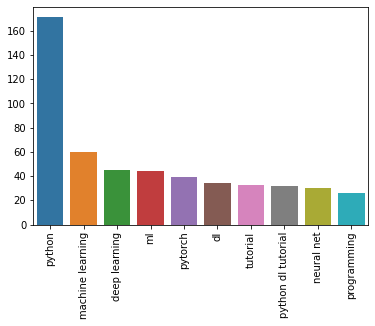

In [45]:
#tag_count
ax = sns.barplot(x=list(tag_count.keys())[:10], y=list(tag_count.values())[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## EDA

### Best performing videos

Text(0, 0.5, 'View Counts')

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 10060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 10060 missing from current font.
  font.set_text(s, 0, flags=flags)


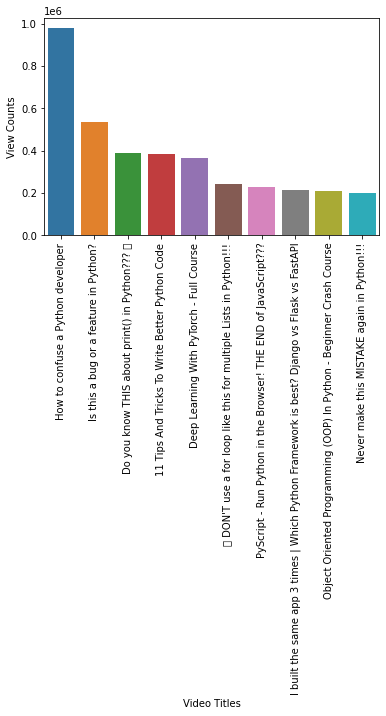

In [34]:
ax = sns.barplot(x='title', y='viewCount', data=vid_df.sort_values('viewCount', ascending=False)[:10])
ax.set_xlabel("Video Titles")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("View Counts")

### Worst performing video

Text(0, 0.5, 'View Counts')

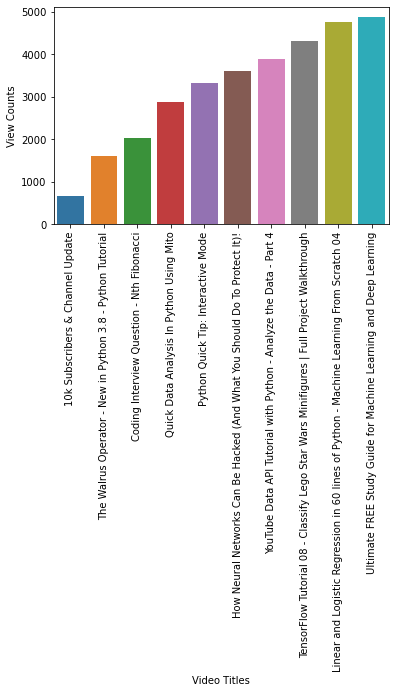

In [35]:
ax = sns.barplot(x='title', y='viewCount', data=vid_df.sort_values('viewCount', ascending=True)[:10])
ax.set_xlabel("Video Titles")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("View Counts")

### View distribution per video

<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

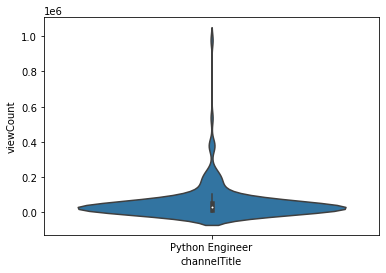

In [37]:
sns.violinplot(x='channelTitle', y='viewCount', data=vid_df)

### Views vs. Likes, Comments and No. of tags

<AxesSubplot:xlabel='tagCount', ylabel='viewCount'>

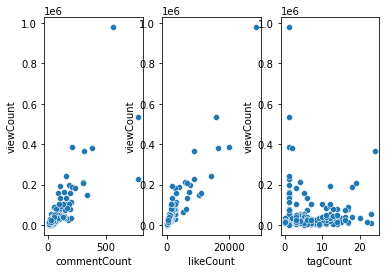

In [46]:
fig, ax = plt.subplots(1,3)
sns.scatterplot(data=vid_df, x='commentCount', y='viewCount', ax=ax[0])
sns.scatterplot(data=vid_df, x='likeCount', y='viewCount', ax=ax[1])
sns.scatterplot(data=vid_df, x='tagCount', y='viewCount', ax=ax[2])

### Views vs. tag count

In [ ]:
tags = vid_df.loc[:,['tags','viewCount']]
tags['count_tags'] = tags['tags'].apply(lambda x: len(x) if x else 0)
tags.head()

### Video duration

<AxesSubplot:xlabel='durationSeconds', ylabel='Count'>

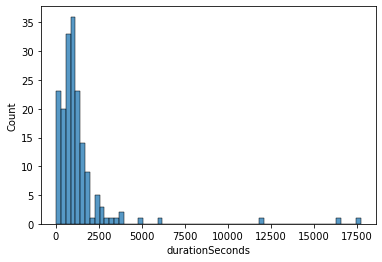

In [40]:
sns.histplot(data=vid_df, x='durationSeconds')

In [42]:
vid_df.columns

Index(['vid_id', 'channelTitle', 'title', 'description', 'tags', 'publishedAt',
       'viewCount', 'likeCount', 'favouriteCount', 'commentCount', 'duration',
       'definition', 'caption', 'publishedAt_week', 'durationSeconds',
       'tagCount'],
      dtype='object')

### Upload schedule

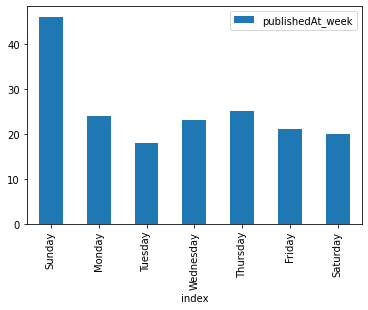

In [43]:
day_df = pd.DataFrame(vid_df['publishedAt_week'].value_counts())
weekdays = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishedAt_week')